This notebook contains code to train a neural network with one hidden layer on MNIST. At the end is a short exercise to add a second layer.

In [15]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import scipy
import scipy.misc
import math
import PIL

%matplotlib inline
import matplotlib.pyplot as plt

import sys
import os
import re
import random
import glob

print (scipy.misc.imread)

<function imread at 0x7fb902c5f488>


In [16]:
path = './images/'
res_path = './res_png/'

sess = None
def ResetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()
ResetSession()

### Code for a single hidden layer nn

In [17]:

NUM_CLASSES = 10
NUM_PIXELS = 400 * 400

BATCH_SIZE = 100

MAX_VAL = 255

whole_set = glob.glob(path + '*.png')
whole_labels = []
whole_data = []
random.shuffle(whole_set)
for i in whole_set:
#     print (i)
    regex_res = re.search('X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+)(_X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+))?.png', i)
    
    append_label = np.zeros((NUM_CLASSES), dtype=np.float32)
    x_ind = (int(regex_res.group(1)) - 1) / 40
    np.put(append_label, x_ind, 1)
    whole_labels.append(append_label)
    
    img = scipy.misc.imread(i, flatten=True, mode='L').astype(np.float)
    img.shape = (NUM_PIXELS)
    img = img / MAX_VAL
#     print (np.amin(img), np.amax(img))
    whole_data.append(img)
#     break

# mnist = input_data.read_data_sets('/tmp/data', one_hot=True);

TRAIN_STEPS = 150

HIDDEN1_UNITS = 128
LEARNING_RATE = 0.5

# As before, here are our placeholders for images and labels
x = tf.placeholder(tf.float32, [None, NUM_PIXELS], name="pixels")
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES], name="labels")

def weight_variable(inputs, outputs, name):
    # why initialize weights this way?
    # http://cs231n.github.io/neural-networks-2/
    initial = tf.truncated_normal(shape=[inputs, outputs], stddev=1.0 / math.sqrt(float(inputs)))
    return tf.Variable(initial, name=name)

def bias_variable(shape, name):
    initial = tf.constant(0.0, shape=[shape])
    return tf.Variable(initial, name=name)

weights1 = weight_variable(NUM_PIXELS, HIDDEN1_UNITS, "weights1")
biases1 = bias_variable(HIDDEN1_UNITS, "biases1")
hidden1 = tf.nn.relu(tf.matmul(x, weights1) + biases1, name="hidden1")

weights2 = weight_variable(HIDDEN1_UNITS, NUM_CLASSES, "weights2")
biases2 = bias_variable(NUM_CLASSES, "biases2")

y = tf.matmul(hidden1, weights2) + biases2

# Write a summary of the graph (before we add the loss and optimizer)
# Which will add a bunch of nodes automatically
# sw = tf.summary.FileWriter('summaries/single_hidden', graph=tf.get_default_graph())
# sw.close()

# Define loss and optimizer
cross_entropy = tf.reduce_mean(tf.losses.mean_squared_error(predictions=y, labels=y_))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

sess.run(tf.global_variables_initializer())

for i in range(TRAIN_STEPS):
    
    _, loss = sess.run([train_step, cross_entropy], feed_dict={x: whole_data, y_: whole_labels})

    if i % 10 == 0: print (i, "loss %f" % loss)
        

0 loss 0.956573
10 loss 45001.042969
20 loss 5471.138672
30 loss 665.241150
40 loss 80.956223
50 loss 9.920952
60 loss 1.284725
70 loss 0.234758
80 loss 0.107106
90 loss 0.091586
100 loss 0.089700
110 loss 0.089470
120 loss 0.089443
130 loss 0.089439
140 loss 0.089438


In [61]:
np.set_printoptions(threshold='nan')

test_set = glob.glob(res_path + '*.png')
test_labels = []
test_data = []
random.shuffle(test_set)
for i in test_set:
    regex_res = re.search('X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+)(_X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+))?.png', i)
    
    append_label = np.zeros((NUM_CLASSES), dtype=np.float32)
    x_ind = (int(regex_res.group(1)) - 1) / 40
    np.put(append_label, x_ind, 1)
    test_labels.append(append_label)
    
    img = scipy.misc.imread(i, flatten=False, mode='RGBA').astype(np.float)
    img = img[:,:,3]
    img.shape = (NUM_PIXELS)
    img = img / MAX_VAL
#     print (np.amin(img), np.amax(img))
    test_data.append(img)
    break
print ("done")

done


In [64]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Accuracy %f" % sess.run(accuracy, feed_dict={x: test_data,
                                  y_: test_labels}))


Accuracy 0.000000


Predicted: 6, Actual: 3


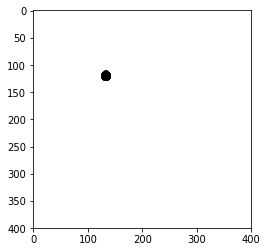

In [65]:
prediction = tf.argmax(y, 1)

def predict(idx):
    image = test_data[idx]
    return sess.run(prediction, feed_dict={x: [image]})

idx = 0
actual = np.argmax(test_labels[idx])
print ("Predicted: %d, Actual: %d" % (predict(idx), actual))
output = (test_data[idx].reshape((400,400)) * 255)
plt.imshow(output, cmap=plt.cm.gray_r)